# Image Segmentation with UNet


This guide covers learning end-to-end Image Segmentation with Keras and Tensorflow.

When the guide is completed, it will be able to develop Image Segmentation algorithms with U-Net architecture.

- E-mail: grboguz@gmail.com
- Github: https://github.com/grboguz
- Discord: https://discord.gg/TjTDKdvF8A
- Udemy: https://www.udemy.com/user/oguzhan-gurbuz/
- Linkedin: https://www.linkedin.com/in/o%C4%9Fuzhan-g%C3%BCrb%C3%BCz-4780481a6/

![picture](https://nanonets.com/blog/content/images/2018/11/1_rZ1vDrOBWqISFiNL5OMEbg.jpeg)

# Contents

  1.   Semantic Segmentation
  2.   UNet
  3.   Binary Segmentation
  4.   Multi-Class Segmentation

# 1. Semantic Segmentation
***Semantic Segmentation*** or ***Image Segmentation*** is a deep learning algorithm that associates each pixel in an image with a tag or category. For example, an autonomous vehicle; must identify vehicles, pedestrians, traffic signs, sidewalks, and other road features. All these processes can be performed using the image segmentation technique.

The application areas are:
- Autonomous Driving
- Industrial Application
- Satellite Images
- Medical Imaging
- Robotics

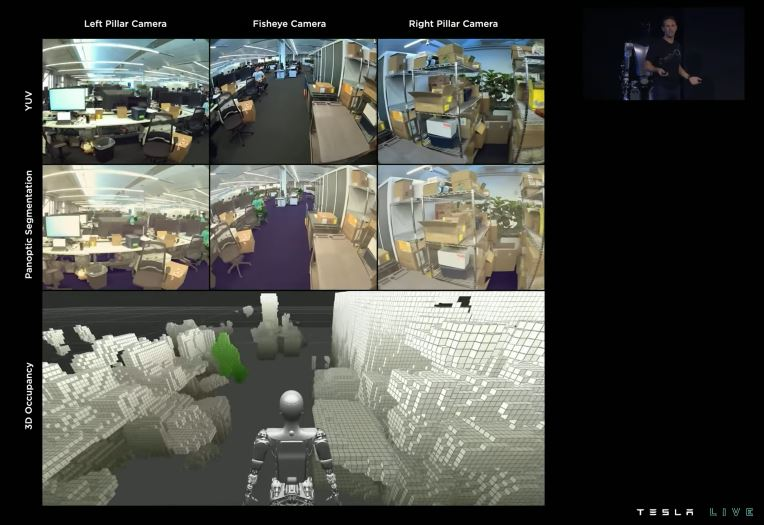

https://www.youtube.com/watch?v=ODSJsviD_SU (min 47.27)

# 2. UNet


U-Net is a convolutional neural network developed by researchers at the University of Freiburg for segmentation biomedical images.

![picture](https://gholste.me/publication/holste-spie-2020/featured_hu005251c37a4f49559965411aa987786b_649805_720x0_resize_lanczos_2.png)

The network architecture is based on the fully convolutional network and has been modified and expanded to work with fewer training images and provide more precise segmentations. Also, this network is so fast that it takes less than 1 second on the GPU to segment a 512x512 image. (https://en.wikipedia.org/wiki/U-Net)

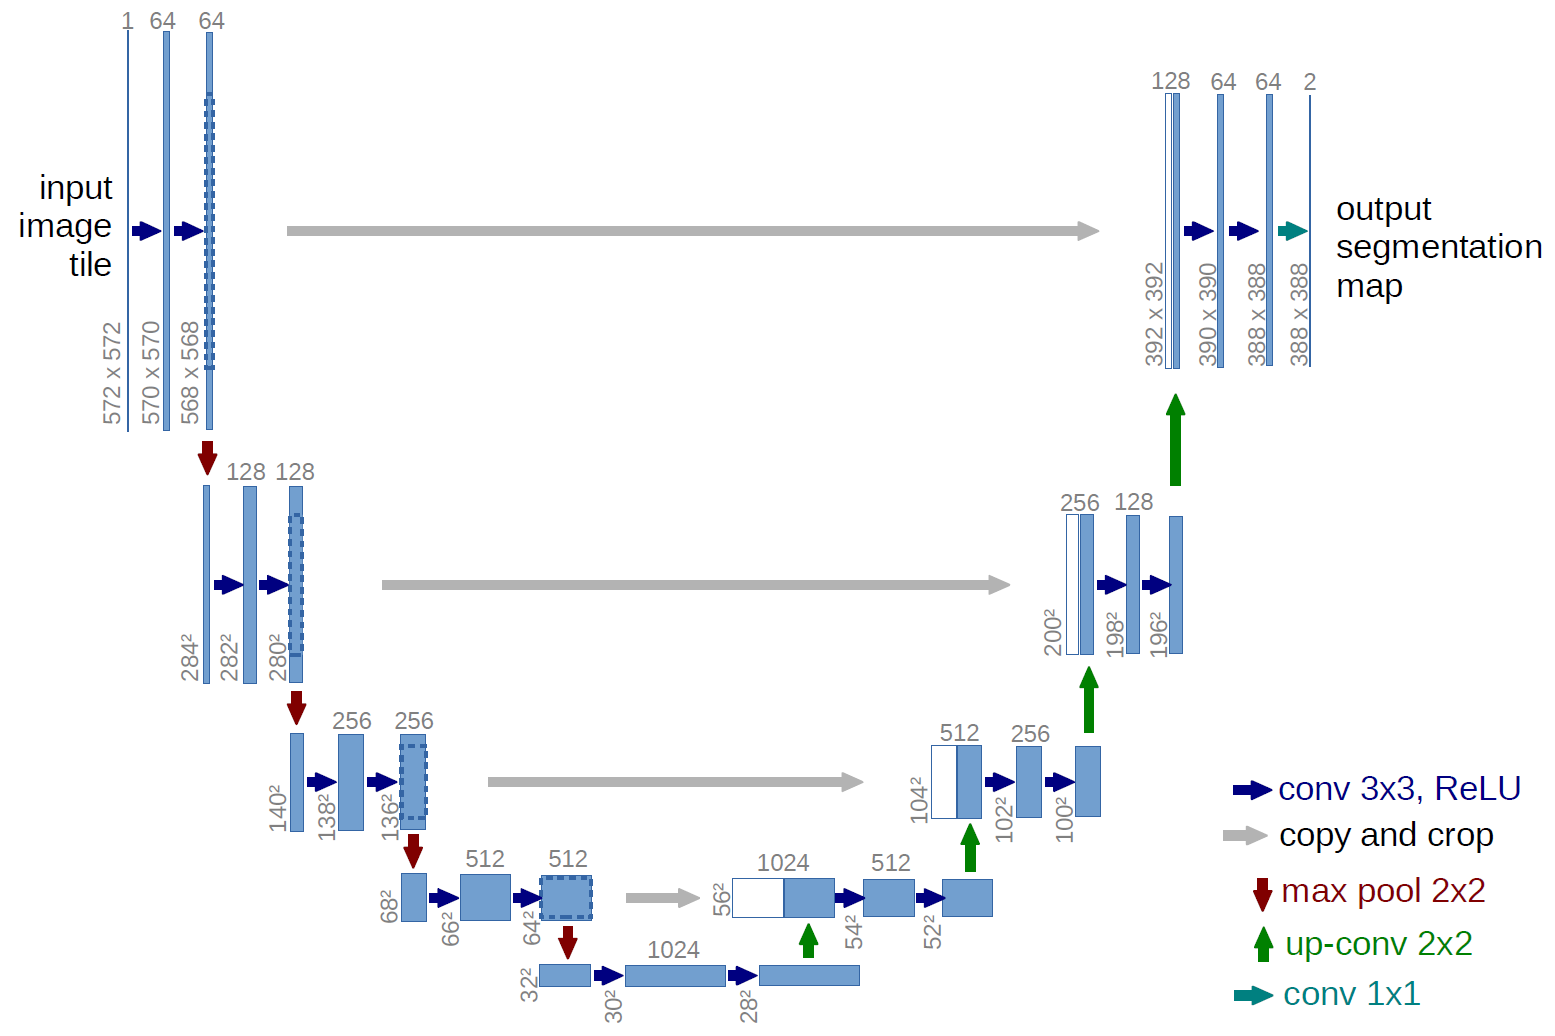

UNet architecture consists of 3 parts:
- Encoder
- Decoder
- Skip Connection

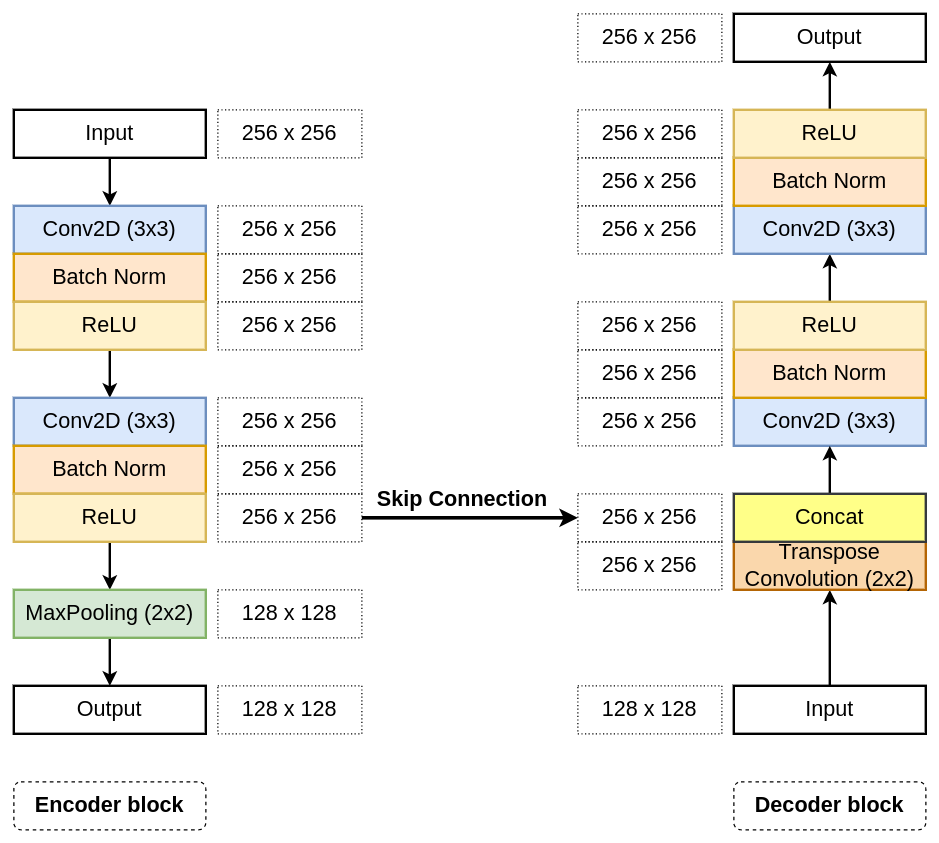

- Let's examine the simplified version of UNet architecture and start coding with Keras.

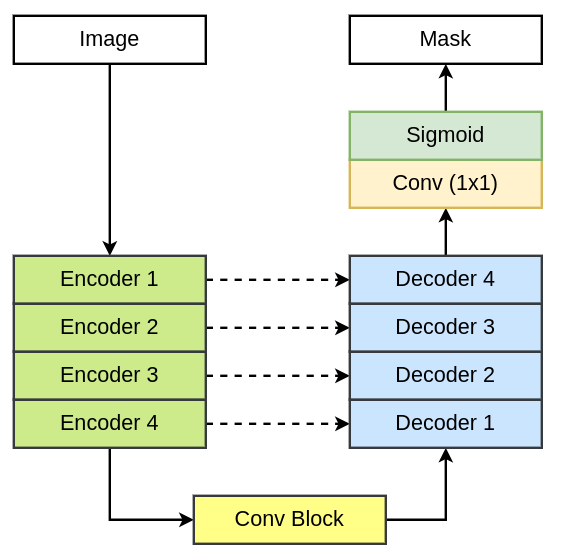

In [ ]:
# import libraries
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input

In [ ]:
# convolution block
def conv_block(inputs, num_filters):
  x = Conv2D(num_filters, 3, padding="same")(inputs)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  x = Conv2D(num_filters, 3, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  return x

In [ ]:
#encoder block
def encoder_block(inputs, num_filters):
  x = conv_block(inputs, num_filters)
  p = MaxPool2D((2,2))(x)

  return x, p

In [ ]:
#decoder block
def decoder_block(inputs, skip ,num_filters):
  x = Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(inputs)
  x = Concatenate()([x, skip])
  x = conv_block(x, num_filters)

  return x

In [ ]:
# unet
def build_unet(input_shape):
  inputs = Input(input_shape)

  # encoder blocks
  s1, p1 = encoder_block(inputs, 64)
  s2, p2 = encoder_block(p1, 128)
  s3, p3 = encoder_block(p2, 256)
  s4, p4 = encoder_block(p3, 512)

  # bridge
  b1 = conv_block(p4, 1024)

  # decoder
  d1 = decoder_block(b1, s4, 512)
  d2 = decoder_block(d1, s3, 256)
  d3 = decoder_block(d2, s2, 128)
  d4 = decoder_block(d3, s1, 64)

  outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

  model = Model(inputs, outputs, name="UNET")

  return model

In [ ]:
input_shape = (256,256,3)
model = build_unet(input_shape)

In [ ]:
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 256, 256, 64)         0         ['batch_normalization[0][0]

# 3. Binary Segmentation


Binary Semantic Segmentation is the process of separating the pixels of an image into two categories. Pixels of foreground objects of an image and pixels of background objects of an image.

Image segmentation is a major challenge in image processing and computer vision in many applications, from background subtraction to object tracking.

![picture](https://camo.githubusercontent.com/773d2b494242e988b627634f016969c990f80289fd385c86e958c952a8f7775e/68747470733a2f2f686162726173746f726167652e6f72672f776562742f62632f65672f67382f6263656767387a6467642d636f2d6c69703668786e3937366a646d2e6a706567)

In this example, we will perform segmentation on mitochondria in images examined with a microscope. To download the dataset, you can use the link below or the Google Drive link that I shared with you in the course materials:
- https://www.epfl.ch/labs/cvlab/data/data-em/

After downloading the dataset, upload it to Google Drive.

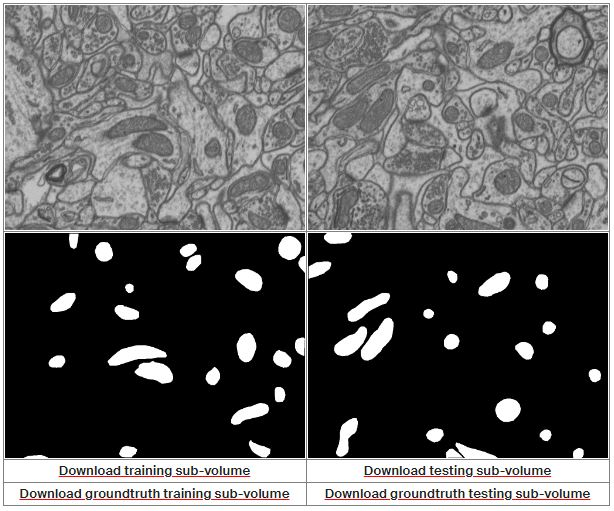

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
%cd /content/drive/MyDrive/DCU-PhD/_THESIS/UNET-elastin


In [ ]:
%ls

dataset/                     elastin_percentage_TF.csv        model-elatin-TF-100steps.hdf5
dataset-IADE/                model-elatin-IADE-100steps.hdf5  model-elatin-TF-200steps.hdf5
dataset-pilot/               model-elatin-IADE-200steps.hdf5  model-elatin-TF-50steps.hdf5
dataset-sham/                model-elatin-IADE-50steps.hdf5   UNET-elastin-IADE.ipynb
dataset-TF/                  model-elatin-sham-100steps.hdf5  UNET-Elastin.ppt
elastin_percentage_IADE.csv  model-elatin-sham-200steps.hdf5  UNET-elastin-sham.ipynb
elastin_percentage_Sham.csv  model-elatin-sham-50steps.hdf5   UNET-elastin-TF.ipynb


In [ ]:
# importing libraries
import os
import cv2
import glob
import random

import numpy as np
from PIL import Image
from keras.optimizers import Adam

from matplotlib import pyplot as plt
from tensorflow.keras.utils import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input

Görüntüleri Hazırlama

In [ ]:
# define path for masks and images
image_directory = "/content/drive/MyDrive/DCU-PhD/_THESIS/UNET-elastin/dataset-sham/images"
mask_directory = "/content/drive/MyDrive/DCU-PhD/_THESIS/UNET-elastin/dataset-sham/masks"

SIZE = 256

In [ ]:
image_data = []
mask_data = []

images = os.listdir(image_directory)
masks = os.listdir(mask_directory)

print(images)
print(masks)

['sham_img_1.tif', 'sham_img_2.tif', 'sham_img_3.tif', 'sham_img_4.tif', 'sham_img_5.tif', 'sham_img_6.tif', 'sham_img_7.tif', 'sham_img_8.tif', 'sham_img_9.tif', 'sham_img_10.tif', 'sham_img_11.tif', 'sham_img_12.tif', 'sham_img_13.tif', 'sham_img_14.tif', 'sham_img_15.tif', 'sham_img_16.tif', 'sham_img_17.tif', 'sham_img_18.tif', 'sham_img_19.tif', 'sham_img_20.tif', 'sham_img_22.tif', 'sham_img_23.tif', 'sham_img_24.tif', 'sham_img_25.tif', 'sham_img_26.tif', 'sham_img_21.tif']
['sham_mask_1.tif', 'sham_mask_2.tif', 'sham_mask_3.tif', 'sham_mask_4.tif', 'sham_mask_5.tif', 'sham_mask_6.tif', 'sham_mask_7.tif', 'sham_mask_8.tif', 'sham_mask_9.tif', 'sham_mask_10.tif', 'sham_mask_11.tif', 'sham_mask_12.tif', 'sham_mask_13.tif', 'sham_mask_14.tif', 'sham_mask_15.tif', 'sham_mask_16.tif', 'sham_mask_17.tif', 'sham_mask_18.tif', 'sham_mask_19.tif', 'sham_mask_20.tif', 'sham_mask_21.tif', 'sham_mask_22.tif', 'sham_mask_23.tif', 'sham_mask_24.tif', 'sham_mask_25.tif', 'sham_mask_26.tif']


In [ ]:

# Directory where training images are located
#image_directory = "Images"

# Define the size you want to resize the images to
SIZE = 256

# List to store image data
image_data = []

# Use sorted glob to get a sorted list of image file paths in the directory
image_files = sorted(glob.glob(image_directory + "/*.tif"))

for image_path in image_files:
    # Read the image
    image = cv2.imread(image_path, 0)

    # Convert to a PIL image
    image = Image.fromarray(image)

    # Resize the image
    image = image.resize((SIZE, SIZE))

    # Append the image data to the list
    image_data.append(np.array(image))


In [ ]:
# Directory where training images are located
#image_directory = "Images"

# Define the size you want to resize the images to
SIZE = 256

# List to store image data
mask_data = []

# Use sorted glob to get a sorted list of image file paths in the directory
image_files = sorted(glob.glob(mask_directory + "/*.tif"))

for image_path in image_files:
    # Read the image
    image = cv2.imread(image_path, 0)

    # Convert to a PIL image
    image = Image.fromarray(image)

    # Resize the image
    image = image.resize((SIZE, SIZE))

    # Append the image data to the list
    mask_data.append(np.array(image))

In [ ]:
print(len(image_data))
print(len(mask_data))

26
26


In [ ]:
# normalize images
image_data = np.expand_dims(normalize(np.array(image_data),axis=1),3)
print(image_data.shape)

(26, 256, 256, 1)


In [ ]:
# normalize masks
mask_data = np.expand_dims(np.array(mask_data),3) / 255.
print(mask_data.shape)

(26, 256, 256, 1)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, mask_data,
                                                  test_size=0.5, random_state=0)

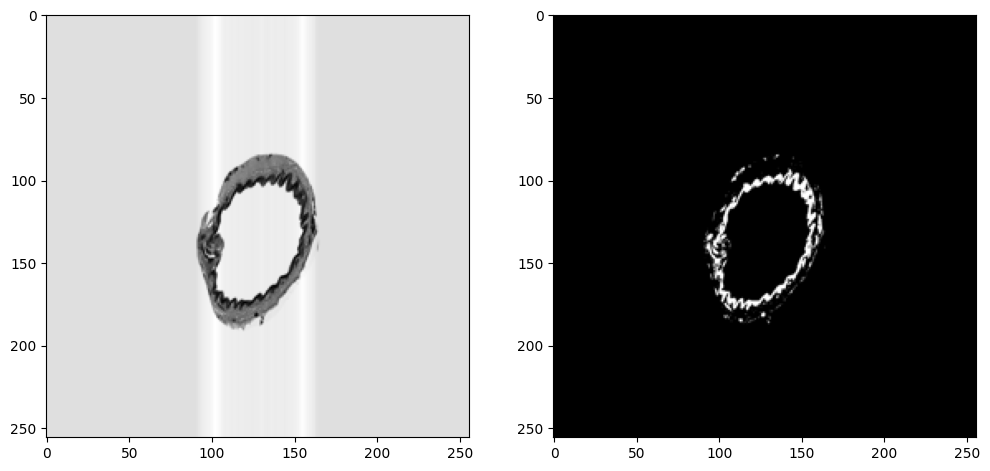

In [ ]:
image_number = random.randint(0, len(X_train))

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256,256)),cmap="gray")

plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256,256)),cmap="gray")

plt.show()

Model

In [ ]:
# convolution block
def conv_block(inputs, num_filters):
  x = Conv2D(num_filters, 3, padding="same")(inputs)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  x = Conv2D(num_filters, 3, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  return x

In [ ]:
#encoder block
def encoder_block(inputs, num_filters):
  x = conv_block(inputs, num_filters)
  p = MaxPool2D((2,2))(x)

  return x, p

In [ ]:
#decoder block
def decoder_block(inputs, skip, num_filters):
  x = Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(inputs)
  x = Concatenate()([x, skip])
  x = conv_block(x, num_filters)
  return x

In [ ]:
# unet
def build_unet(input_shape):
  inputs = Input(input_shape)

  # Encoder
  s1, p1 = encoder_block(inputs, 64)
  s2, p2 = encoder_block(p1, 128)
  s3, p3 = encoder_block(p2, 256)
  s4, p4 = encoder_block(p3, 512)

  # Bridge
  b1 = conv_block(p4, 1024)

  # Decoder
  d1 = decoder_block(b1, s4, 512)
  d2 = decoder_block(d1, s3, 256)
  d3 = decoder_block(d2, s2, 128)
  d4 = decoder_block(d3, s1, 64)

  outputs = Conv2D(1, 1, padding = "same", activation = "sigmoid")(d4)

  model = Model(inputs, outputs, name="UNET")
  return model

In [ ]:
input_shape = (256,256,1)
model = build_unet(input_shape)

In [ ]:
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 256, 256, 64)         640       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_18 (Ba  (None, 256, 256, 64)         256       ['conv2d_19[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_18 (Activation)  (None, 256, 256, 64)         0         ['batch_normalization_18[0]

In [ ]:
model.compile(optimizer = Adam(learning_rate=1e-3), loss="binary_crossentropy",
              metrics = ["accuracy"])

Eğitim (Training)

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=1,
                    verbose = 1,
                    epochs = 50,
                    validation_data=(X_val, y_val),
                    shuffle=False)

Epoch 1/50
20/20 [==============================] - 17s 124ms/step - loss: 0.0102 - accuracy: 0.9763 - val_loss: 0.0191 - val_accuracy: 0.9719
Epoch 2/50
20/20 [==============================] - 2s 97ms/step - loss: 0.0101 - accuracy: 0.9763 - val_loss: 0.0182 - val_accuracy: 0.9722
Epoch 3/50
20/20 [==============================] - 2s 97ms/step - loss: 0.0101 - accuracy: 0.9763 - val_loss: 0.0181 - val_accuracy: 0.9722
Epoch 4/50
20/20 [==============================] - 2s 97ms/step - loss: 0.0101 - accuracy: 0.9763 - val_loss: 0.0236 - val_accuracy: 0.9708
Epoch 5/50
20/20 [==============================] - 2s 107ms/step - loss: 0.0101 - accuracy: 0.9763 - val_loss: 0.0216 - val_accuracy: 0.9710
Epoch 6/50
20/20 [==============================] - 2s 101ms/step - loss: 0.0101 - accuracy: 0.9763 - val_loss: 0.0181 - val_accuracy: 0.9721
Epoch 7/50
20/20 [==============================] - 2s 98ms/step - loss: 0.0102 - accuracy: 0.9763 - val_loss: 0.0180 - val_accuracy: 0.9723
Epoch 8/5

In [ ]:
import tensorflow as tf

In [ ]:
model

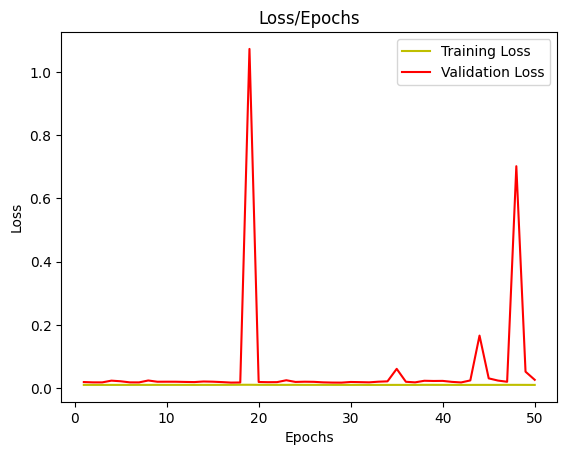

In [ ]:
# visualize loss/val_los
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "y", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")

plt.title("Loss/Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

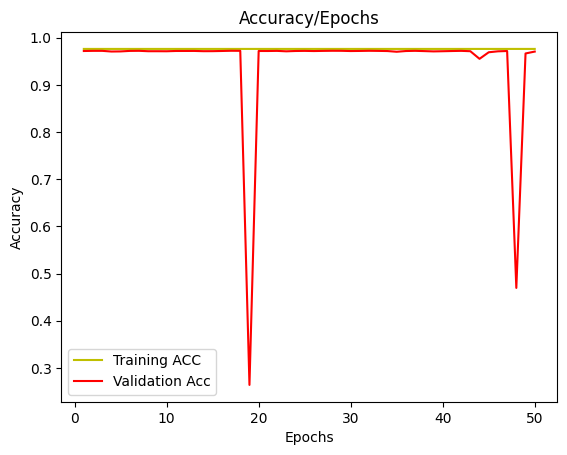

In [ ]:
# visualize acc/val_acc
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, "y", label="Training ACC")
plt.plot(epochs, val_acc, "r", label="Validation Acc")

plt.title("Accuracy/Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [ ]:
# saving model
model_path = "/content/drive/MyDrive/DCU-PhD/_THESIS/UNET-elastin/model-elatin-sham-50steps.hdf5"
model.save(model_path)



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_path = "/content/drive/MyDrive/DCU-PhD/_THESIS/UNET-elastin/model-elatin-sham-100steps.hdf5"

Prediction (Tespit)

In [ ]:
ls

dataset/                         model-elatin-IADE-200steps.hdf5  model-elatin-TF-200steps.hdf5
dataset-IADE/                    model-elatin-IADE-50steps.hdf5   model-elatin-TF-50steps.hdf5
dataset-pilot/                   model-elatin-sham-100steps.hdf5  UNET-elastin-IADE.ipynb
dataset-sham/                    model-elatin-sham-200steps.hdf5  UNET-Elastin.ppt
dataset-TF/                      model-elatin-sham-50steps.hdf5   UNET-elastin-sham.ipynb
model-elatin-IADE-100steps.hdf5  model-elatin-TF-100steps.hdf5    UNET-elastin-TF.ipynb


In [ ]:
from keras.models import load_model
model = load_model(model_path)

In [ ]:
from tensorflow.keras.metrics import MeanIoU

y_prediction = model.predict(X_val)
y_prediction_thresholded = y_prediction > 0.5

1/1 [==============================] - 17s 17s/step


In [ ]:
num_classes = 2
IoU = MeanIoU(num_classes=num_classes)
IoU.update_state(y_prediction_thresholded, y_val)
print("Mean IoU: ", IoU.result().numpy())

Mean IoU:  0.685796


1/1 [==============================] - 2s 2s/step


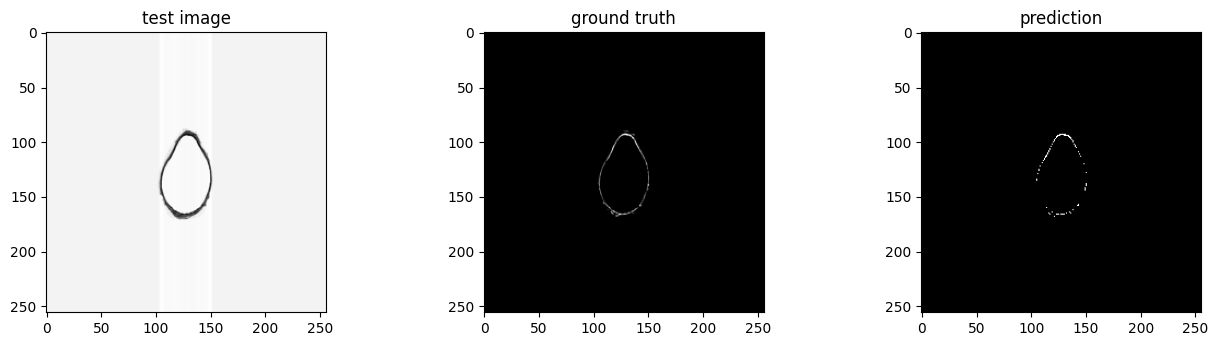

In [ ]:
threshold = 0.4
test_number = random.randint(0, len(X_val)-1)

test_img = X_val[test_number]
ground_truth = y_val[test_number]

test_input = np.expand_dims(test_img,0)
prediction = (model.predict(test_input)[0,:,:,0]>0.5).astype(np.uint8)

plt.figure(figsize=(16,8))

plt.subplot(231)
plt.title("test image")
plt.imshow(test_img[:,:,0],cmap="gray")

plt.subplot(232)
plt.title("ground truth")
plt.imshow(ground_truth[:,:,0],cmap="gray")

plt.subplot(233)
plt.title("prediction")
plt.imshow(prediction,cmap="gray")

plt.show()

In [ ]:
print(len(X_val))

13


In [ ]:
prediction

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

1/1 [==============================] - 0s 21ms/step


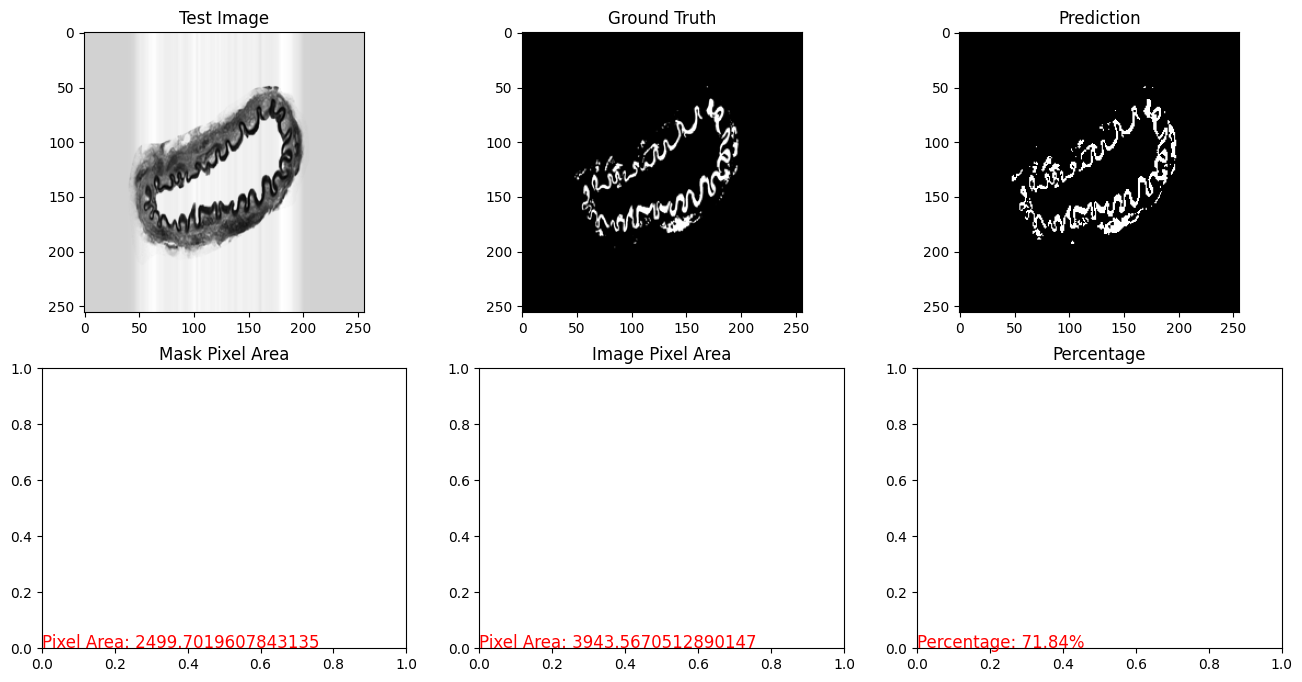

1/1 [==============================] - 0s 21ms/step


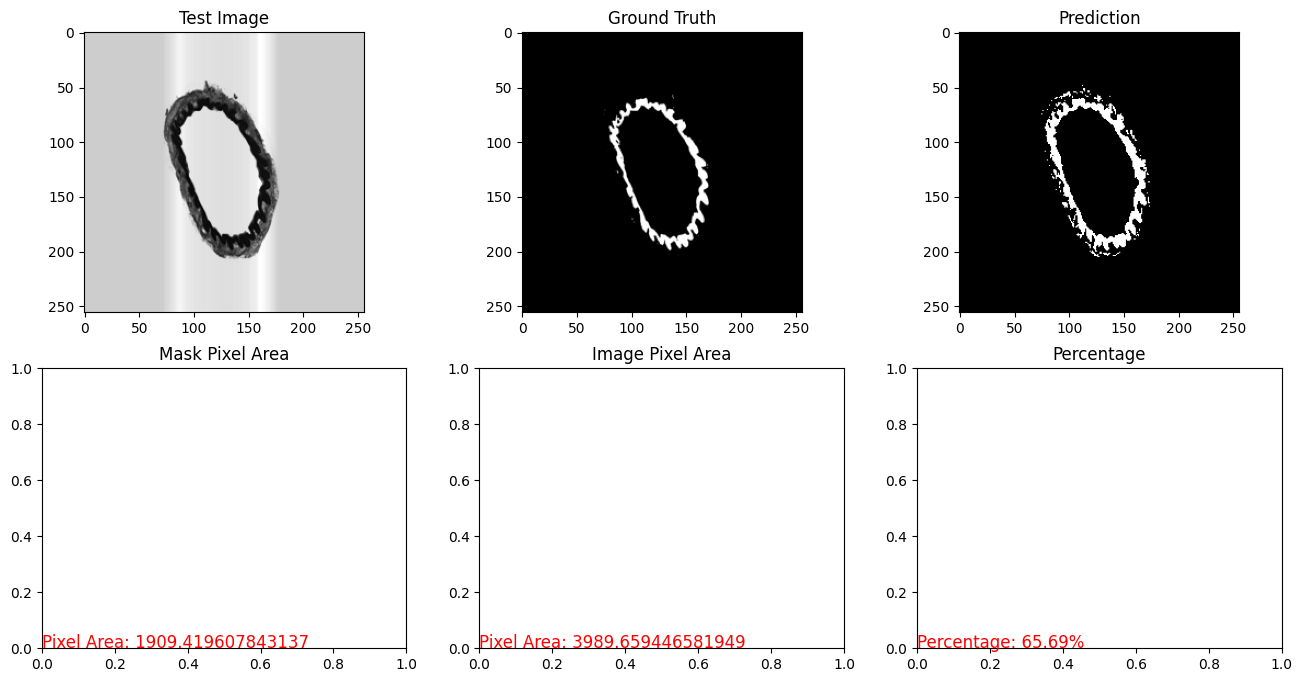

1/1 [==============================] - 0s 20ms/step


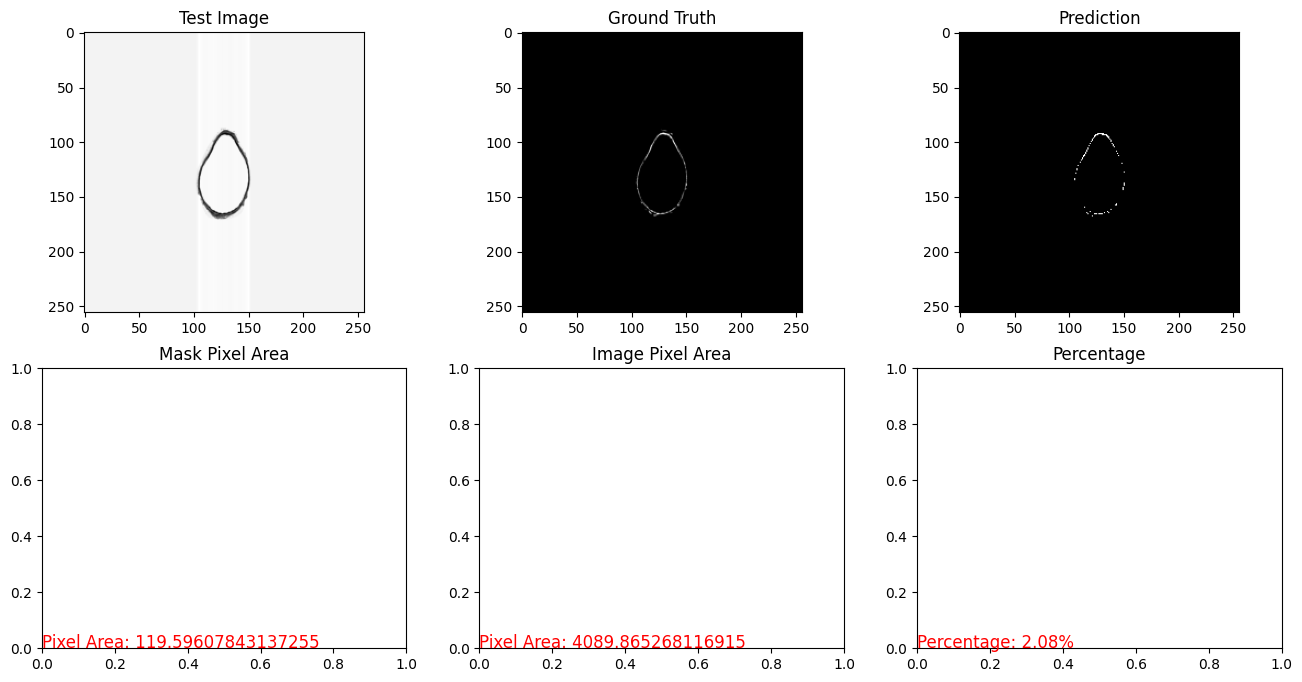

1/1 [==============================] - 0s 20ms/step


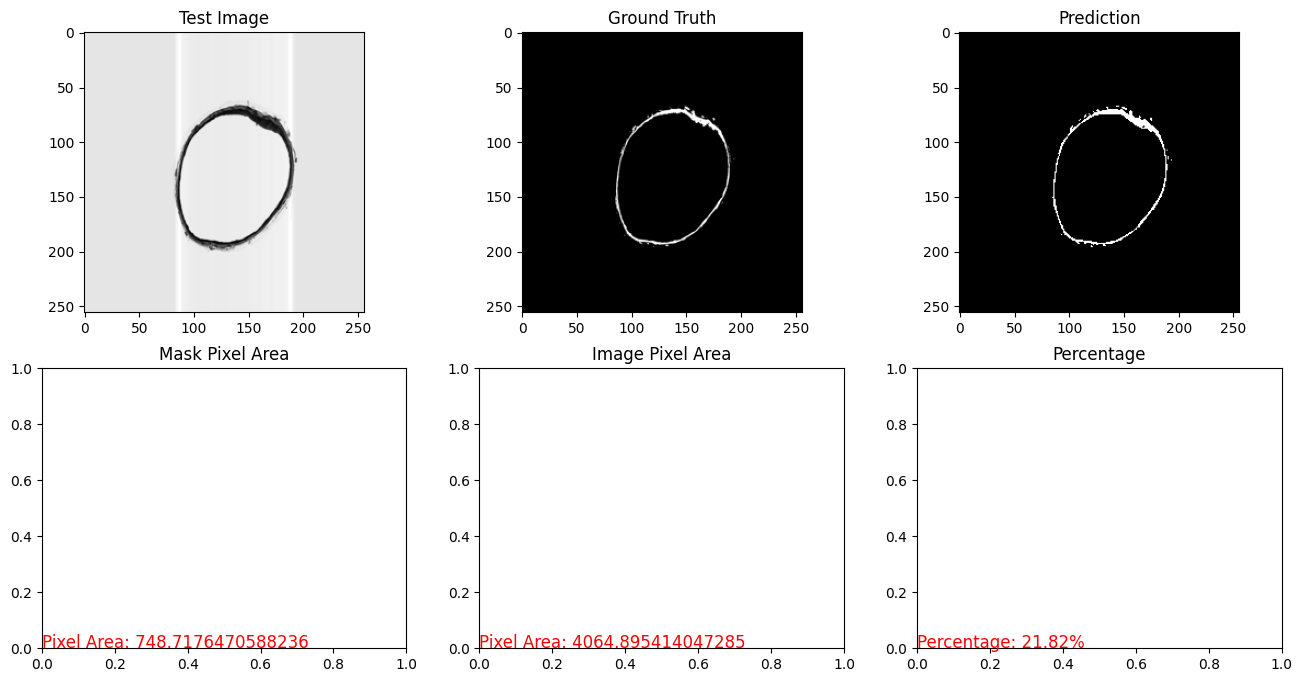

1/1 [==============================] - 0s 19ms/step


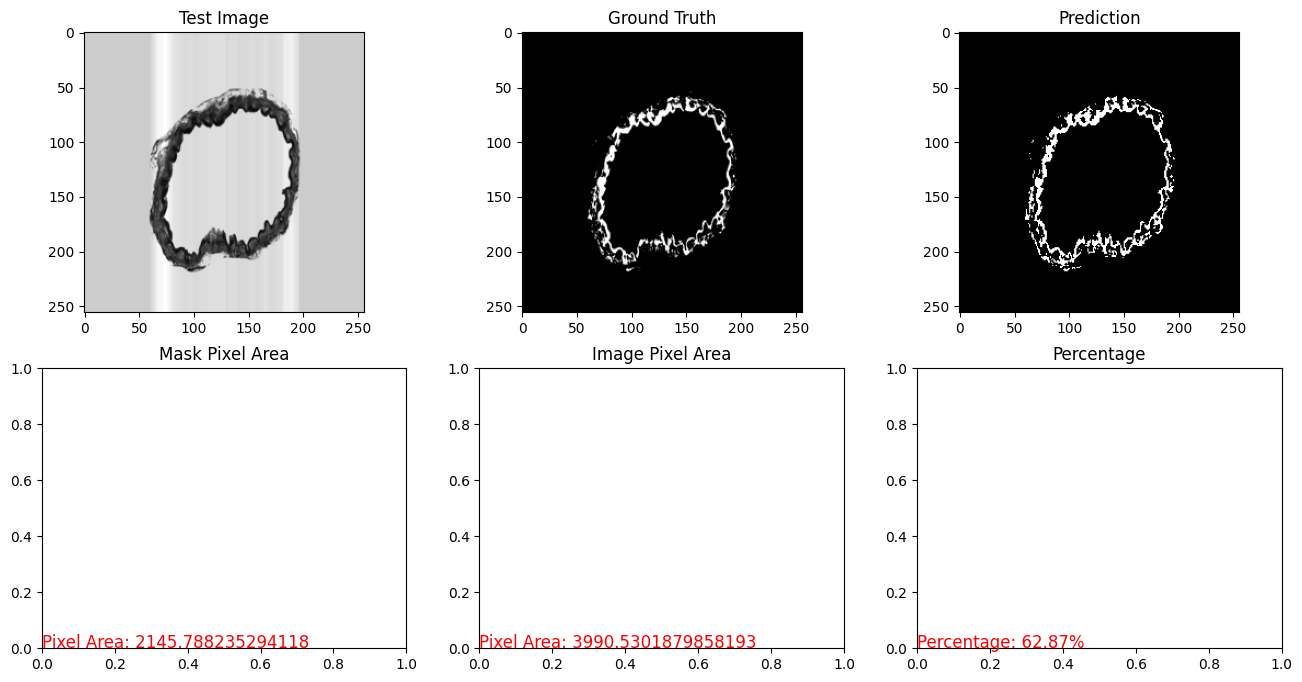

1/1 [==============================] - 0s 20ms/step


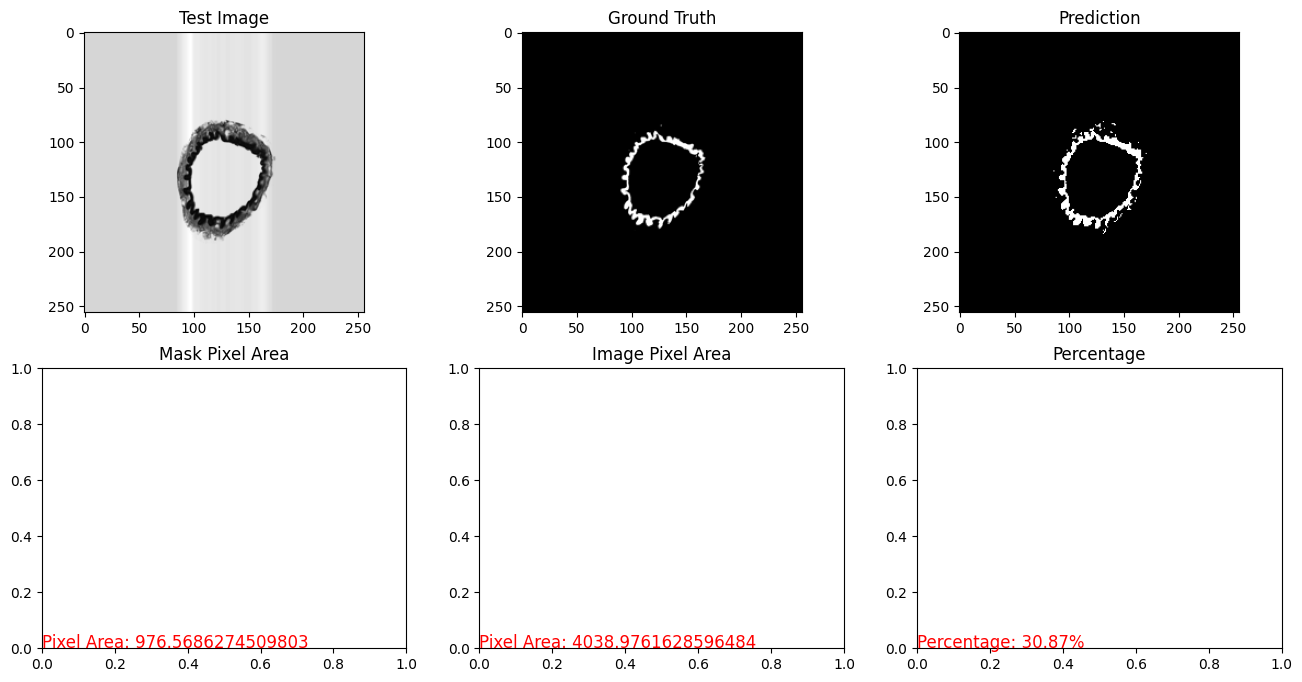

1/1 [==============================] - 0s 34ms/step


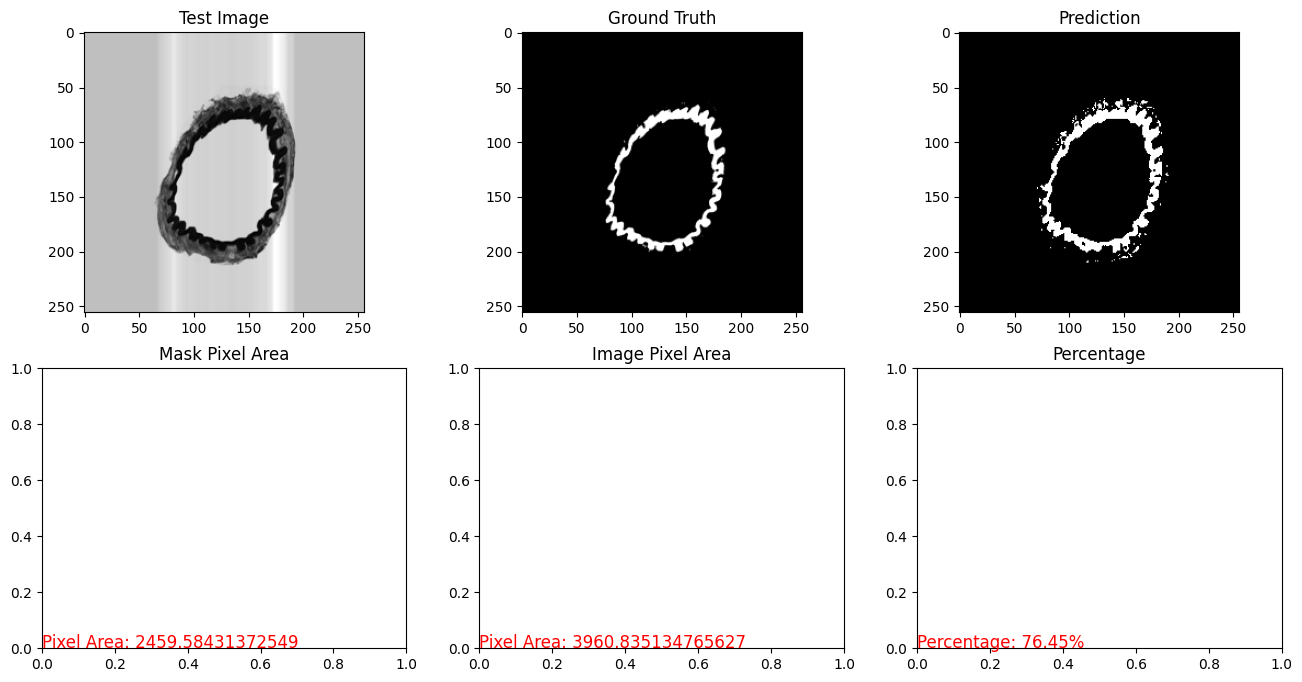

1/1 [==============================] - 0s 34ms/step


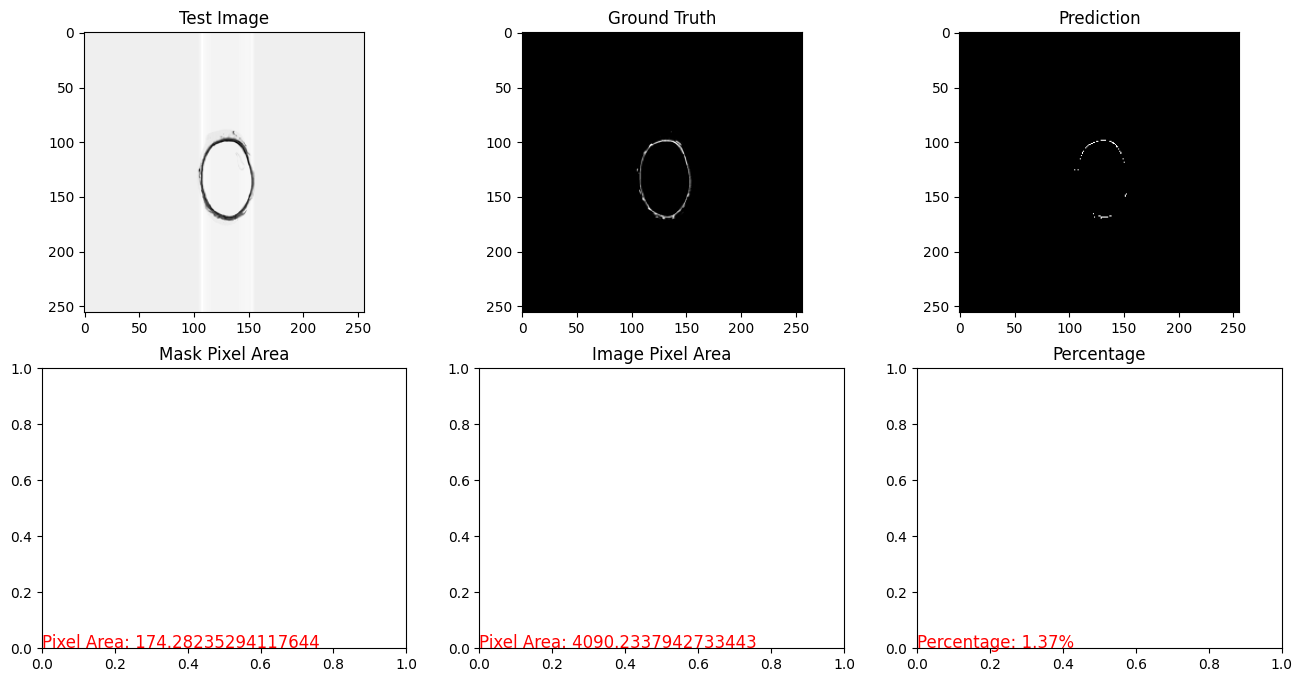

1/1 [==============================] - 0s 32ms/step


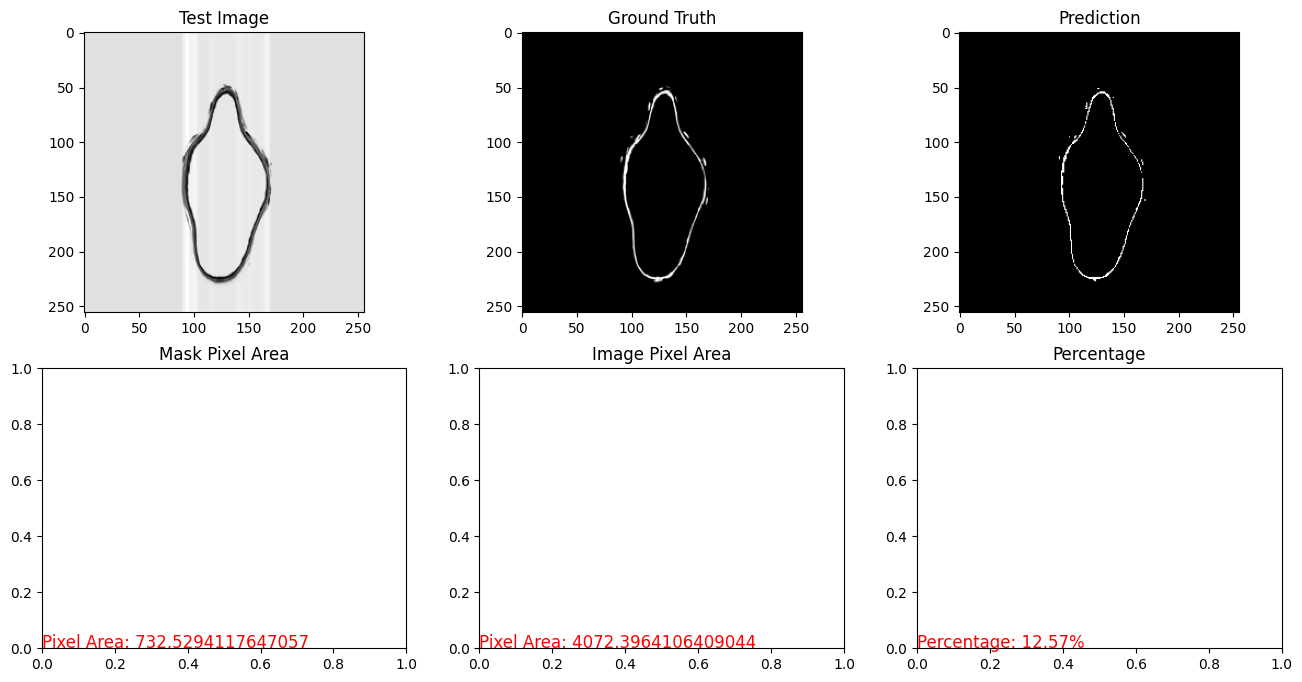

1/1 [==============================] - 0s 20ms/step


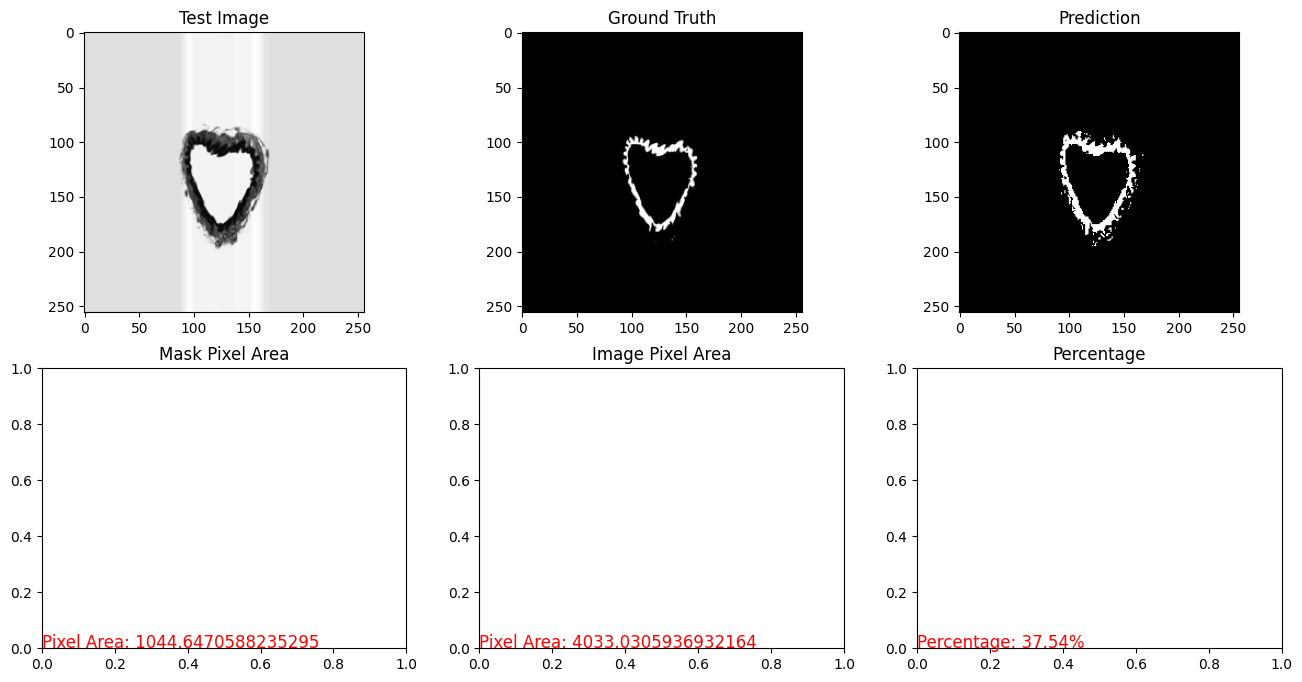

1/1 [==============================] - 0s 18ms/step


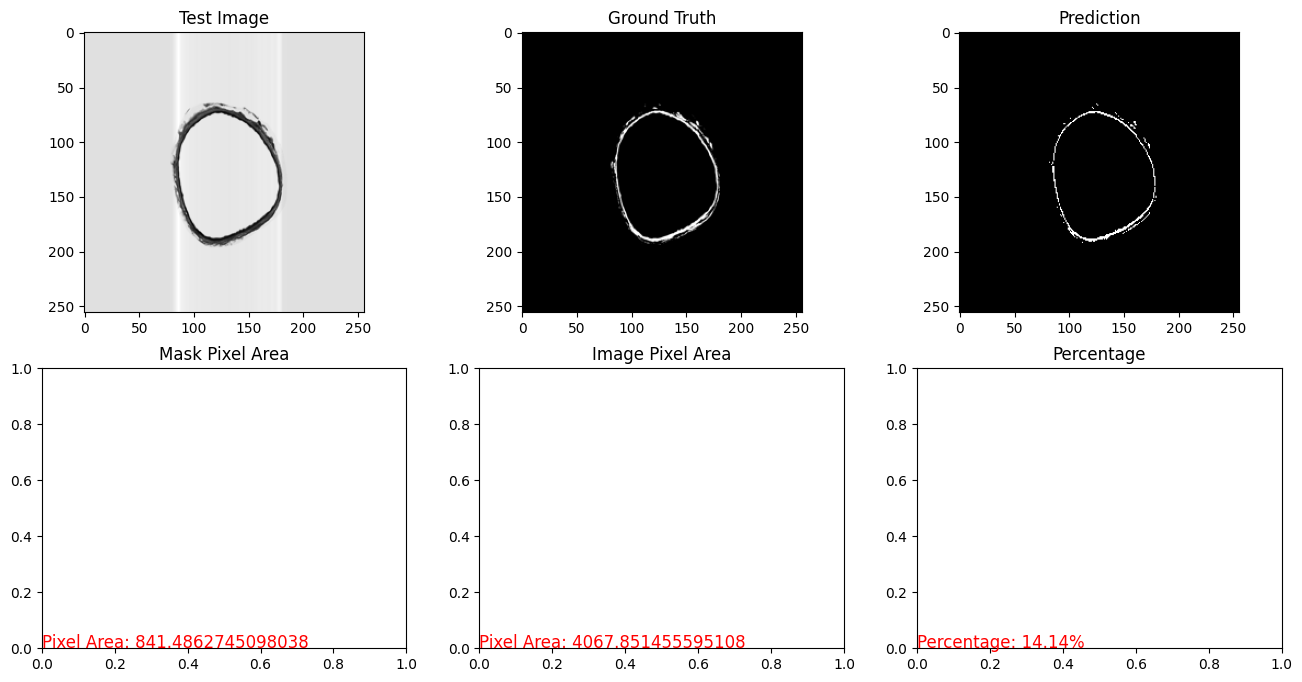

1/1 [==============================] - 0s 23ms/step


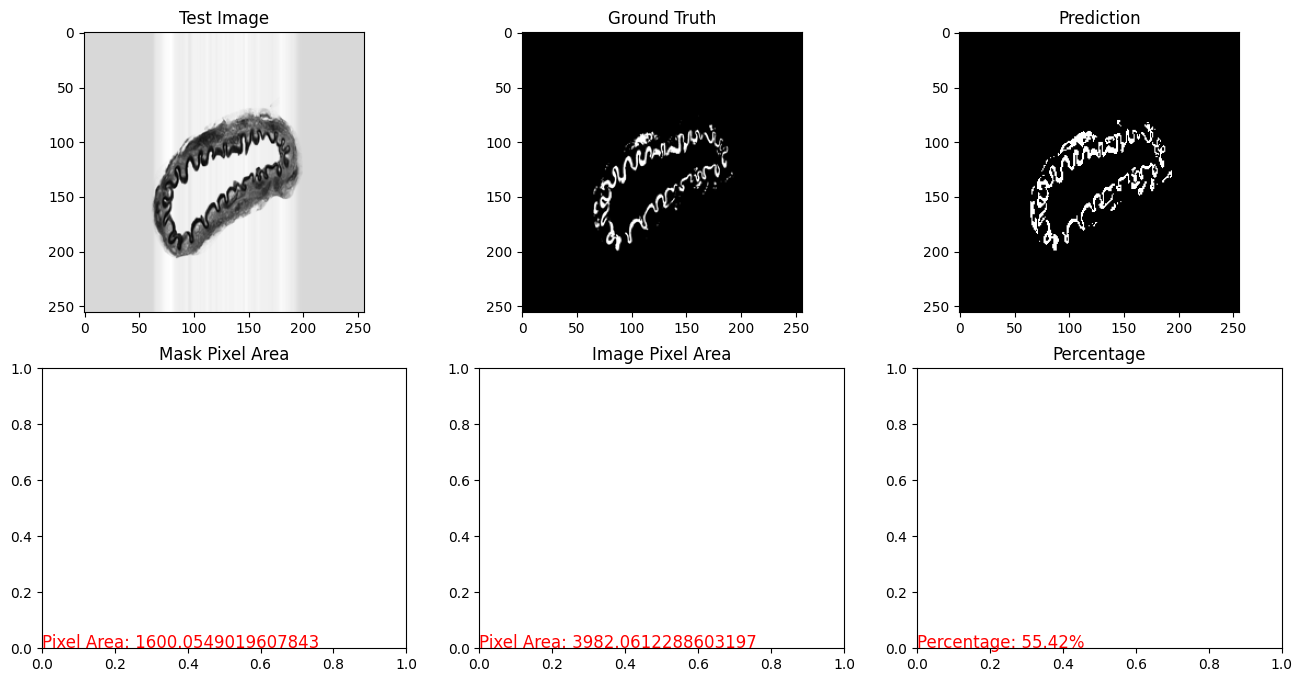

1/1 [==============================] - 0s 22ms/step


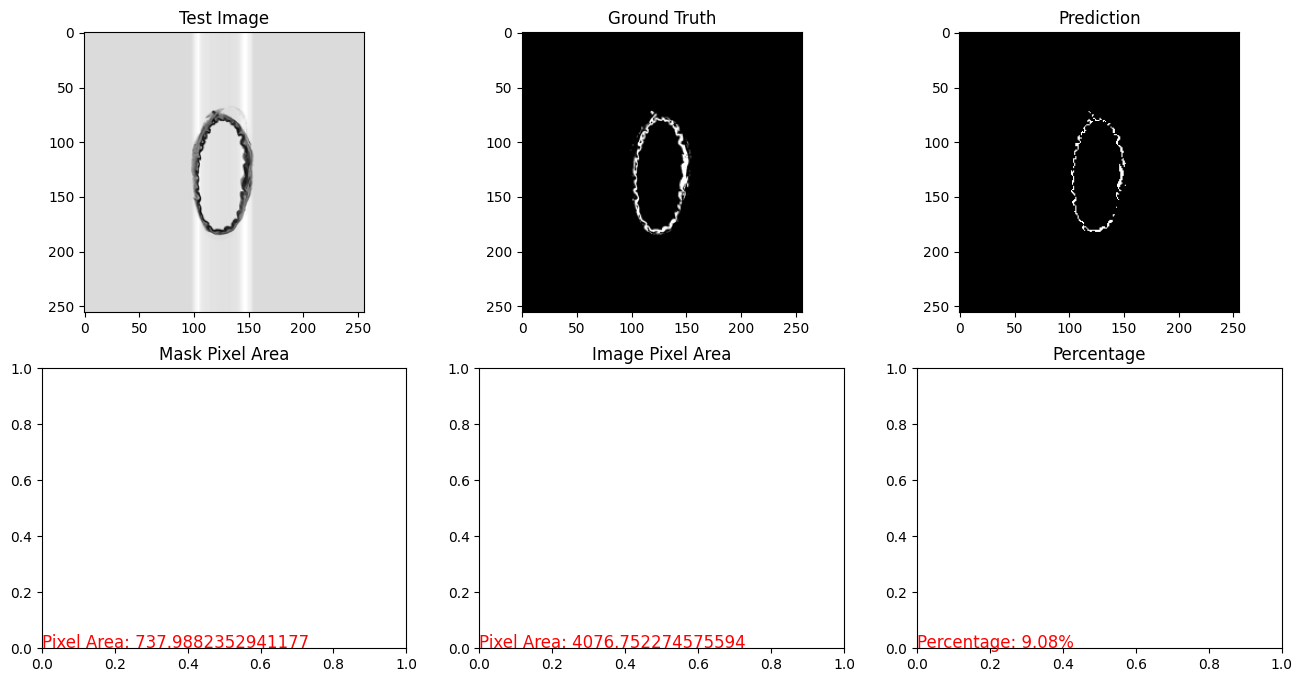

Image 1: Percentage = 9.08%
Image 2: Percentage = 9.08%
Image 3: Percentage = 9.08%
Image 4: Percentage = 9.08%
Image 5: Percentage = 9.08%
Image 6: Percentage = 9.08%
Image 7: Percentage = 9.08%
Image 8: Percentage = 9.08%
Image 9: Percentage = 9.08%
Image 10: Percentage = 9.08%
Image 11: Percentage = 9.08%
Image 12: Percentage = 9.08%
Image 13: Percentage = 9.08%


In [ ]:
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Initialize a list to store the percentage results
percentage_GT_results = []

percentage_DT_results = []

# Loop through each image in X_val
for i in range(len(X_val)):
    test_img = X_val[i]
    ground_truth = y_val[i]

    test_input = np.expand_dims(test_img, 0)
    prediction = (model.predict(test_input)[0, :, :, 0] > 0.5).astype(np.uint8)

    # Calculate pixel area in the mask
    mask_pixel_area = np.sum(ground_truth)

    # Calculate pixel area in the input image
    image_pixel_area = np.sum(test_img)

    # Calculate the pixel area in the prediction
    prediction_pixel_area = np.sum(prediction)


    # Calculate the percentage of GT
    percentage1 = (mask_pixel_area / image_pixel_area) * 100

    # Calculate the % of DT
    percentage2 = (prediction_pixel_area / image_pixel_area) * 100



    # Append the result to the list
    percentage_GT_results.append(percentage1)
    percentage_DT_results.append(percentage2)

    # Plot the images and results
    plt.figure(figsize=(16, 8))

    plt.subplot(231)
    plt.title("Test Image")
    plt.imshow(test_img[:, :, 0], cmap="gray")

    plt.subplot(232)
    plt.title("Ground Truth")
    plt.imshow(ground_truth[:, :, 0], cmap="gray")

    plt.subplot(233)
    plt.title("Prediction")
    plt.imshow(prediction, cmap="gray")

    plt.subplot(234)
    plt.title("Mask Pixel Area")
    plt.text(0, 0, f"Pixel Area: {mask_pixel_area}", fontsize=12, color="red")

    plt.subplot(235)
    plt.title("Image Pixel Area")
    plt.text(0, 0, f"Pixel Area: {image_pixel_area}", fontsize=12, color="red")

    plt.subplot(236)
    plt.title("Percentage")
    plt.text(0, 0, f"Percentage: {percentage2:.2f}%", fontsize=12, color="red")

    plt.show()

# Print the percentage results
for i, percentage in enumerate(percentage_DT_results):
    print(f"Image {i + 1}: Percentage = {percentage:.2f}%")


In [ ]:
# Save percentage data to a CSV file
import csv
csv_file = "elastin_percentage_GT_Sham.csv"
with open(csv_file, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Image", "PercentageGT"])
    for i, percentage in enumerate(percentage_GT_results):
        writer.writerow([f"Image {i + 1}", percentage])

print(f"Percentage data saved to {csv_file}")

Percentage data saved to elastin_percentage_GT_Sham.csv


In [ ]:
csv_file = "elastin_percentage_DT_Sham.csv"
with open(csv_file, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Image", "PercentageDT"])
    for i, percentage in enumerate(percentage_DT_results):
        writer.writerow([f"Image {i + 1}", percentage])

print(f"Percentage data saved to {csv_file}")

Percentage data saved to elastin_percentage_DT_Sham.csv


In [ ]:
!pip list > package_list.txt



# 5. Multiclass Image Segmentation


There are basically two classes in Binary Semantic Segmentation applications:
- Object
- Background

In Multi-Class Segmentation applications, there are more than 2 classes. For example:
- Cat
- Dog
- Background

![picture](https://d2l.ai/_images/segmentation.svg)

In this application, we will use the *Oxford IIT Pet* dataset.
- https://www.tensorflow.org/datasets/catalog/oxford_iiit_pet

![picture](https://assets.website-files.com/5d61c69f45d893b46d52758f/5d9ec124a410725bf3e835cd_Screenshot_577.jpg)

Library

In [ ]:
import tensorflow as tf
from tensorflow import keras

import tensorflow_datasets
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

Dataset

In [ ]:
dataset, info = tensorflow_datasets.load("oxford_iiit_pet:3.*.*", with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteSZWT1I/oxford_iiit_pet-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteSZWT1I/oxford_iiit_pet-test.tfrecord*...: …

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/3.2.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_path='/root/tensorflow_datasets/oxford_iiit_pet/3.2.0',
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=774.69 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=37),
        'segmentation_mask': Image(shape=(None, None, 1), dtype=uint8),
        'species': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    sp

In [ ]:
print(dataset)

{'train': <PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>, 'test': <PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}


In [ ]:
print(dataset["train"])

<PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


Preparing Images

In [ ]:
def data_resize(input_image, input_mask):
  input_image = tf.image.resize(input_image, (128,128), method="nearest")
  input_mask = tf.image.resize(input_mask, (128,128), method="nearest")

  return input_image, input_mask

In [ ]:
def data_augmentation(input_image, input_mask):
  input_image = tf.image.flip_left_right(input_image)
  input_mask = tf.image.flip_left_right(input_mask)

  return input_image, input_mask

In [ ]:
def data_normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1

  return input_image, input_mask

In [ ]:
def load_image_train(data):
  input_image = data["image"]
  input_mask = data["segmentation_mask"]

  input_image, input_mask = data_resize(input_image, input_mask)
  input_image, input_mask = data_augmentation(input_image, input_mask)
  input_image, input_mask = data_normalize(input_image, input_mask)

  return input_image, input_mask

In [ ]:
def load_image_test(data):
  input_image = data["image"]
  input_mask = data["segmentation_mask"]

  input_image, input_mask = data_resize(input_image, input_mask)
  input_image, input_mask = data_normalize(input_image, input_mask)

  return input_image, input_mask

In [ ]:
train_dataset = dataset["train"].map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = dataset["test"].map(load_image_test, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
print("[INFO].. ", train_dataset)
print("[INFO].. ", test_dataset)

[INFO]..  <ParallelMapDataset element_spec=(TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(128, 128, 1), dtype=tf.uint8, name=None))>
[INFO]..  <ParallelMapDataset element_spec=(TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(128, 128, 1), dtype=tf.uint8, name=None))>


In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000

In [ ]:
train_batches = train_dataset.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_batches = train_batches.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

validation_batches = test_dataset.take(3000).batch(BATCH_SIZE)

test_batches = test_dataset.skip(3000).take(669).batch(BATCH_SIZE)

In [ ]:
print("[INFO].. ", train_batches)
print("[INFO].. ", validation_batches)
print("[INFO].. ", test_batches)

[INFO]..  <PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 128, 128, 1), dtype=tf.uint8, name=None))>
[INFO]..  <BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 128, 128, 1), dtype=tf.uint8, name=None))>
[INFO]..  <BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 128, 128, 1), dtype=tf.uint8, name=None))>


In [ ]:
def display_dataset(display_list):
  title = ["Input Image", "Ground Truth", "Prediciton"]
  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis("off")
  plt.show()

In [ ]:
sample_batches = next(iter(test_batches))
random_number = np.random.choice(sample_batches[0].shape[0])

sample_image, sample_mask = sample_batches[0][random_number], sample_batches[1][random_number]

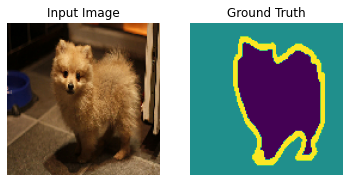

In [ ]:
display_dataset([sample_image, sample_mask])

Model

In [ ]:
# convolution block
def conv_block(inputs, num_filters):
  x = Conv2D(num_filters, 3, padding="same")(inputs)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  x = Conv2D(num_filters, 3, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  return x

In [ ]:
# encoder block
def encoder_block(inputs, num_filters):
  x = conv_block(inputs, num_filters)
  p = MaxPool2D((2,2))(x)

  return x, p

In [ ]:
# decoder block
def decoder_block(inputs, skip, num_filters):
  x = Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(inputs)
  x = Concatenate()([x, skip])
  x = conv_block(x, num_filters)
  return x

In [ ]:
# unet
def build_unet(input_shape):
  inputs = Input(input_shape)

  # Encoder
  s1, p1 = encoder_block(inputs, 64)
  s2, p2 = encoder_block(p1, 128)
  s3, p3 = encoder_block(p2, 256)
  s4, p4 = encoder_block(p3, 512)

  # Bridge
  b1 = conv_block(p4, 1024)

  # Decoder
  d1 = decoder_block(b1, s4, 512)
  d2 = decoder_block(d1, s3, 256)
  d3 = decoder_block(d2, s2, 128)
  d4 = decoder_block(d3, s1, 64)

  outputs = Conv2D(3, 1, padding = "same", activation = "softmax")(d4)

  model = Model(inputs, outputs, name="UNET")
  return model

In [ ]:
input_shape = (128,128,3)
model = build_unet(input_shape)
model.summary()

Model: "UNET"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                              

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics = "accuracy")

Training

In [ ]:
NUM_EPOCHS = 25

TRAIN_LENGTH = info.splits["train"].num_examples
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

VALIDATION_SUBSPLIT = 5
TEST_LENGTH = info.splits["test"].num_examples
VALIDATION_STEPS = TEST_LENGTH // BATCH_SIZE // VALIDATION_SUBSPLIT

In [ ]:
history = model.fit(train_batches,
                    epochs = NUM_EPOCHS,
                    steps_per_epoch = STEPS_PER_EPOCH,
                    validation_steps = VALIDATION_STEPS,
                    validation_data = validation_batches)

Epoch 1/25
57/57 [==============================] - 94s 913ms/step - loss: 0.8114 - accuracy: 0.6414 - val_loss: 6.4971 - val_accuracy: 0.3155
Epoch 2/25
57/57 [==============================] - 59s 874ms/step - loss: 0.6002 - accuracy: 0.7587 - val_loss: 9.0834 - val_accuracy: 0.3813
Epoch 3/25
57/57 [==============================] - 50s 871ms/step - loss: 0.5417 - accuracy: 0.7861 - val_loss: 2.0415 - val_accuracy: 0.6214
Epoch 4/25
57/57 [==============================] - 50s 872ms/step - loss: 0.4787 - accuracy: 0.8129 - val_loss: 1.2931 - val_accuracy: 0.6747
Epoch 5/25
57/57 [==============================] - 50s 872ms/step - loss: 0.4337 - accuracy: 0.8310 - val_loss: 0.6525 - val_accuracy: 0.7612
Epoch 6/25
57/57 [==============================] - 51s 896ms/step - loss: 0.3981 - accuracy: 0.8451 - val_loss: 0.6070 - val_accuracy: 0.7886
Epoch 7/25
57/57 [==============================] - 49s 858ms/step - loss: 0.3803 - accuracy: 0.8519 - val_loss: 0.6200 - val_accuracy: 0.7923

Visualizing Results

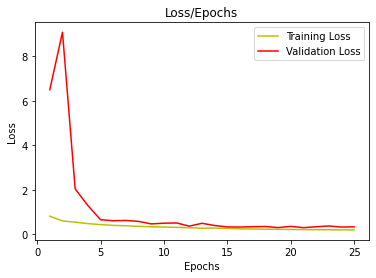

In [ ]:
# visualize loss/ val_los
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "y", label = "Training Loss")
plt.plot(epochs, val_loss, "r", label = "Validation Loss")

plt.title("Loss/Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

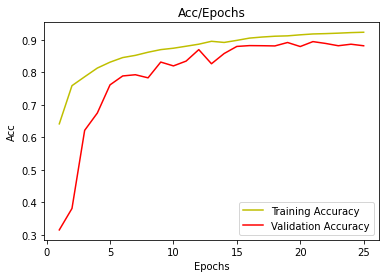

In [ ]:
# visualize acc/val_acc
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, "y", label = "Training Accuracy")
plt.plot(epochs, val_acc, "r", label = "Validation Accuracy")

plt.title("Acc/Epochs")
plt.xlabel("Epochs")
plt.ylabel("Acc")

plt.legend()
plt.show()

Prediction (Segmentation Results)

In [ ]:
"""
(batch_size, height, width, channels)  #  tensor shape
(batch_size, height, width)            #  argmax
(batch_size, height, width, 1)         #  unsqueeze
(height, width, 1)                     #  final
"""

In [ ]:
def create_mask(prediction):
  prediction = tf.argmax(prediction, axis=-1)
  prediction = prediction[..., tf.newaxis]
  return prediction[0]

In [ ]:
def show_result(batches,num):
  for image, mask in batches.take(num):
    prediction = model.predict(image)
    display_dataset([image[0], mask[0], create_mask(prediction)])

2/2 [==============================] - 1s 170ms/step


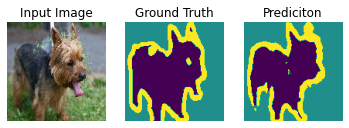

2/2 [==============================] - 0s 127ms/step


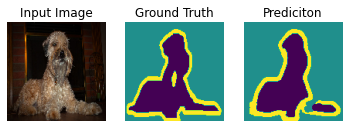

2/2 [==============================] - 0s 126ms/step


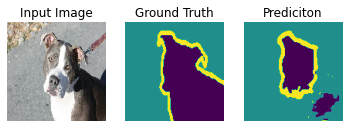

In [ ]:
show_result(test_batches.skip(5),3)